# **MODEL TRAINING**

In [1]:
!pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
    --------------------------------------- 1.3/102.5 MB 6.7 MB/s eta 0:00:16
    --------------------------------------- 2.4/102.5 MB 6.1 MB/s eta 0:00:17
   - -------------------------------------- 4.2/102.5 MB 7.2 MB/s eta 0:00:14
   -- ------------------------------------- 5.2/102.5 MB 6.6 MB/s eta 0:00:15
   -- ------------------------------------- 6.8/102.5 MB 6.8 MB/s eta 0:00:15
   --- ------------------------------------ 8.7/102.5 MB 7.1 MB/s eta 0:00:14
   ---- ----------------------------------- 10.5/102.5 MB 7.4 MB/s eta 0:00:13
   ---- ----------------------------------- 11.5/102.5 MB 7.1 MB/s eta 0:00:13
   ----- ---------------------------------- 13.1/102.5 MB 7.0 MB/s eta 0:00:13
   ----- ---------------------------------- 14.4/102.5 MB 7.1 MB/s eta 0:00:13
   ------ --------------------------------- 16.0/102.5 MB 6.9 MB/s eta 0:00:13
   ------ --------------------------------- 17.3/102.5 MB 6.9 MB/s

In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [4]:
df=pd.read_csv("StudentsPerformance.csv")

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
x=df.drop(['math score'], axis=1)
x


,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [7]:
y=df['math score']

In [8]:
num_features=x.select_dtypes(exclude=object).columns
cat_features=x.select_dtypes(include=object).columns

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [10]:
num_transformer=StandardScaler()
cat_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",cat_transformer ,cat_features),
        ("StandardScaler",num_transformer,num_features)
    ]

)


In [11]:
X=preprocessor.fit_transform(x)

In [12]:
X.shape

(1000, 19)

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

# **EVALUATE MODEL**

In [14]:
def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mse)
  r2=r2_score(true,predicted)
  return mae,rmse,r2

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for name, model in models.items():
    model.fit(x_train, y_train)

    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(name)
    model_list.append(name)
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append((name,model_test_r2))

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

In [16]:
for model_name, r2 in r2_list:
    print(f"{model_name}: R² Score = {r2:.4f}")

Linear Regression: R² Score = 0.8803
Lasso: R² Score = 0.8253
Ridge: R² Score = 0.8806
K-Neighbors Regressor: R² Score = 0.7838
Decision Tree: R² Score = 0.7613
Random Forest Regressor: R² Score = 0.8490
XGBRegressor: R² Score = 0.8278
CatBoosting Regressor: R² Score = 0.8516
AdaBoost Regressor: R² Score = 0.8447


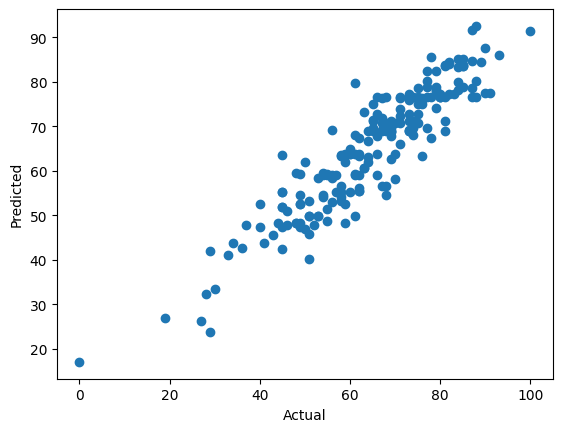

In [17]:
plt.scatter(y_test,y_test_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

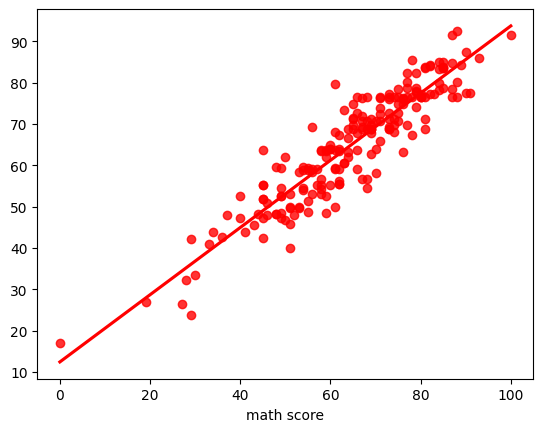

In [18]:
sns.regplot(x=y_test,y=y_test_pred,ci=None,color ='red');

In [19]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.491525,13.508475
737,53,58.472222,-5.472222
740,80,76.558559,3.441441
660,74,76.593220,-2.593220
411,84,83.212389,0.787611
...,...,...,...
408,52,47.855072,4.144928
332,62,56.129496,5.870504
208,74,68.108108,5.891892
613,65,68.912000,-3.912000
